# SNS crawling를 사용하고 데이터 수집


*   snscrape를 사용 (https://github.com/JustAnotherArchivist/snscrape)


In [38]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools

In [40]:
#검색하고 싶은 단어
search_word = "youtube"

#검색하는 기간
start_day = "2022-10-14"
end_day = "2022-10-15"

search_query = search_word + ' since:' + start_day + ' until:' + end_day 

#지정한 기간에서 검색하고 싶은 단어를 포함한 tweet를 취득
scraped_tweets = sntwitter.TwitterSearchScraper(search_query).get_items()

In [41]:
#처음부터 2000개의 tweets를 취득
sliced_scraped_tweets = itertools.islice(scraped_tweets, 2000)

In [42]:
#pandas DataFrame으로 변환
df = pd.DataFrame(sliced_scraped_tweets)

In [43]:
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/AnimeGhoulEmory/status/158...,2022-10-14 17:49:22+00:00,"Check out my new #Callofdutymobile video, now ...",1580979087790968833,AnimeGhoulEmory,[https://youtu.be/xoyOmAqpe_k],https://youtu.be/xoyOmAqpe_k,[https://t.co/gpCn7ePKqp],https://t.co/gpCn7ePKqp
1,https://twitter.com/_bluesbtn/status/158097908...,2022-10-14 17:49:21+00:00,メインYouTube始動するなら\nやっぱりアカウント名変えたい〜\nけど過去のコメとかスパ...,1580979086029369347,_bluesbtn,[],,[],
2,https://twitter.com/ben_9140/status/1580979086...,2022-10-14 17:49:21+00:00,Nicki Minaj - Super Freaky Girl (Official Musi...,1580979086020685824,ben_9140,[https://youtu.be/j5uAR9w7LBg],https://youtu.be/j5uAR9w7LBg,[https://t.co/hB8sfYUJlZ],https://t.co/hB8sfYUJlZ
3,https://twitter.com/mwlifecoaching/status/1580...,2022-10-14 17:49:21+00:00,Jeremy Corbyn DESTROYS The Establishment https...,1580979085823463427,mwlifecoaching,[https://youtu.be/i5Uhqyfk1pY],https://youtu.be/i5Uhqyfk1pY,[https://t.co/ak0GKN8m2u],https://t.co/ak0GKN8m2u
4,https://twitter.com/ChiruYadav20/status/158097...,2022-10-14 17:49:21+00:00,@GyanTherapy @YouTube @OPPOIndia should look i...,1580979084720734208,ChiruYadav20,[],,[],
...,...,...,...,...,...,...,...,...,...
1995,https://twitter.com/456Nunya789/status/1580977...,2022-10-14 17:43:07+00:00,How I feel when NAFO tries to tell me about Ru...,1580977513680973824,456Nunya789,[https://youtu.be/HnV6wR8JRhg],https://youtu.be/HnV6wR8JRhg,[https://t.co/gJSQ85L4VX],https://t.co/gJSQ85L4VX
1996,https://twitter.com/FrankWinfield4/status/1580...,2022-10-14 17:43:07+00:00,"Mass Trespass in Oldhouse Warren, 24/9/22 - St...",1580977513680887808,FrankWinfield4,[https://youtu.be/leig4Qf2sSU],https://youtu.be/leig4Qf2sSU,[https://t.co/ynhsSBvnwo],https://t.co/ynhsSBvnwo
1997,https://twitter.com/tokiutsutsu/status/1580977...,2022-10-14 17:43:07+00:00,【にじさんじ音MAD】フシミオドル https://t.co/ev7kKsFOG0 @You...,1580977513609646081,tokiutsutsu,[https://youtu.be/01b46LqDUvs],https://youtu.be/01b46LqDUvs,[https://t.co/ev7kKsFOG0],https://t.co/ev7kKsFOG0
1998,https://twitter.com/LosoBebe/status/1580977512...,2022-10-14 17:43:06+00:00,#MoodOfTheDay\n\nReamonn - Million Miles https...,1580977512196153344,LosoBebe,[https://youtu.be/iIlkqb_zTEQ],https://youtu.be/iIlkqb_zTEQ,[https://t.co/h22HkRBbOa],https://t.co/h22HkRBbOa


# content에 keyword가 없고 username에 keyword가 있는 경우도 있어서 그런 경우를 제거하자

In [44]:
df = df[df['content'].str.contains('youtube|Youtube|YOUTUBE')]
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
20,https://twitter.com/RBAsesoriaMad/status/15809...,2022-10-14 17:49:17+00:00,😀¡¡NUEVO VIDEO!! 🤓\nEn el perfil o bio puedes ...,1580979067741999104,RBAsesoriaMad,[https://my.mtr.cool/wdpdipjdkc],https://my.mtr.cool/wdpdipjdkc,[https://t.co/D2ipbBfGMC],https://t.co/D2ipbBfGMC
21,https://twitter.com/s0ul_thursday/status/15809...,2022-10-14 17:49:17+00:00,@jaketropolis @Kraut73931587 the second one is...,1580979067645403136,s0ul_thursday,[https://www.youtube.com/watch?v=qwvJ2MnsOgY],https://www.youtube.com/watch?v=qwvJ2MnsOgY,[https://t.co/yBTKojLhAG],https://t.co/yBTKojLhAG
22,https://twitter.com/marcantonydj/status/158097...,2022-10-14 17:49:17+00:00,We Take Out The BNSG ES44C4 With A Long Freigh...,1580979066580045829,marcantonydj,[https://youtu.be/2nZs7JRAQ68],https://youtu.be/2nZs7JRAQ68,[https://t.co/HnvRKdmyzi],https://t.co/HnvRKdmyzi
27,https://twitter.com/cemrenerdem/status/1580979...,2022-10-14 17:49:16+00:00,Yoksa siz daha hala youtube kanalım ile tanışm...,1580979063644360704,cemrenerdem,[https://www.youtube.com/watch?v=zSKq3yPbCYQ&a...,https://www.youtube.com/watch?v=zSKq3yPbCYQ&ab...,[https://t.co/o6Yz8nqc2E],https://t.co/o6Yz8nqc2E
28,https://twitter.com/HANCOCK_LOL/status/1580979...,2022-10-14 17:49:16+00:00,@kakujantics a youtube video once again remind...,1580979063555956736,HANCOCK_LOL,[],,[],
...,...,...,...,...,...,...,...,...,...
1951,https://twitter.com/heresheisalexis/status/158...,2022-10-14 17:43:16+00:00,Going into the weekend like...! #SHOULDADONE 😜...,1580977552893497345,heresheisalexis,[http://www.heresheis.co.uk],http://www.heresheis.co.uk,[https://t.co/IAX1iR0spc],https://t.co/IAX1iR0spc
1952,https://twitter.com/sahupragya237/status/15809...,2022-10-14 17:43:16+00:00,#Supportmalviyaaccademychannel\n@youtubeIndia\...,1580977552268460035,sahupragya237,[],,[],
1966,https://twitter.com/PurpleDoritoChp/status/158...,2022-10-14 17:43:12+00:00,@youtube_bad Wtf,1580977535722323968,PurpleDoritoChp,[],,[],
1976,https://twitter.com/cecenoona/status/158097752...,2022-10-14 17:43:10+00:00,"Said it many times, repeated again &amp; agai...",1580977528319410176,cecenoona,[],,[],


# 텍스트 데이터를 전처리

In [45]:
# df의 열 정보를 확인
df.columns

Index(['url', 'date', 'content', 'id', 'username', 'outlinks', 'outlinksss',
       'tcooutlinks', 'tcooutlinksss'],
      dtype='object')

In [46]:
#data frame에서 텍스트 데이터 열만 추출
df.content

20      😀¡¡NUEVO VIDEO!! 🤓\nEn el perfil o bio puedes ...
21      @jaketropolis @Kraut73931587 the second one is...
22      We Take Out The BNSG ES44C4 With A Long Freigh...
27      Yoksa siz daha hala youtube kanalım ile tanışm...
28      @kakujantics a youtube video once again remind...
                              ...                        
1951    Going into the weekend like...! #SHOULDADONE 😜...
1952    #Supportmalviyaaccademychannel\n@youtubeIndia\...
1966                                     @youtube_bad Wtf
1976    Said it many times, repeated again &amp;  agai...
1990    อย่างชอบ Content มันแบบบดีนะ เคยเห็นพวก Youtub...
Name: content, Length: 216, dtype: object

In [47]:
# 각 트위트의 특징을 확인
for tweet in df.content:
  print(tweet)

😀¡¡NUEVO VIDEO!! 🤓
En el perfil o bio puedes acceder al enlace a Youtube donde podrás visualizar este vídeo u otros muchos 🤓!!  👌🏼¡Actualiza tus conocimientos de Exce y Power BIl! 💻
#excel #excelavanzado #excelpractico #finanzas #formación https://t.co/D2ipbBfGMC https://t.co/OamXToqVur
@jaketropolis @Kraut73931587 the second one is out on youtube 😉https://t.co/yBTKojLhAG
We Take Out The BNSG ES44C4 With A Long Freight - Train Sim World 3 https://t.co/HnvRKdmyzi via @YouTube 

#gaming #youtubegaming #trainsimworld #trains
Yoksa siz daha hala youtube kanalım ile tanışmadınız mı? https://t.co/o6Yz8nqc2E
@kakujantics a youtube video once again reminding everyone he is a millionaire from sitting there 8 hours a day coaching people who havent got keyboard plugged in
@paru4179 @youtube_mia_ LOVE❣️ LOVE💕な二人・・
　　ダイスキです💘
　　　　　これからもヨロシク✨
@NBTradwife More than likely they watched it but have no media literacy and didn't get it, so ran to Youtube and took what some Youtuber said as gospel truth. h

# 불요어(stop words)랑 불필요한 기호 등을 제거

In [48]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [50]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

불요어 추가

In [51]:
stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(["rt", 'youtube']) ###여기서  필요한 stopwords추가
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [52]:
import re
# 트위터분석을 위한 기본적인 텍스트 cleaning 함수
def CleanText(readData, Num=True, Eng=True):
    # Remove Retweets
    text = re.sub('RT @[\w_]+: ', '', readData)
    # Remove Mentions
    text = re.sub('@[\w_]+', '', text)
    # Remove or Replace URL
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ',
                  text)  # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ',
                  text)  # http로 시작되지 않는 url
    # Remove only hashtag simbol "#" because hashtag contains huge information
    text = re.sub(r'#', ' ', text)
    # Remove Garbage Words (ex. &lt, &gt, etc)
    text = re.sub('[&]+[a-z]+', ' ', text)
    # Remove Special Characters
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    # Remove 출처 by yamada
    text = re.sub(r"(출처.*)", ' ', text)
    # Remove newline
    text = text.replace('\n', ' ')

    if Num is True:
        # Remove Numbers
        text = re.sub(r'\d+', ' ', text)

    if Eng is True:
        # Remove English
        text = re.sub('[a-zA-Z]', ' ', text)

    # Remove multi spacing & Reform sentence
    text = ' '.join(text.split())

    return text


tweet를 하나하나 불러오고 stopwords를 제거

In [53]:
cleaned_tweets_all = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  print("---------------------")
  print("전처리 전:", word_tokenize(tweet))
  print("전처리 후:", cleaned_tweet)
  print("---------------------")
  cleaned_tweets_all.append(cleaned_tweet)

---------------------
전처리 전: ['😀¡¡NUEVO', 'VIDEO', '!', '!', '🤓', 'En', 'el', 'perfil', 'o', 'bio', 'puedes', 'acceder', 'al', 'enlace', 'a', 'Youtube', 'donde', 'podrás', 'visualizar', 'este', 'vídeo', 'u', 'otros', 'muchos', '🤓', '!', '!', '👌🏼¡Actualiza', 'tus', 'conocimientos', 'de', 'Exce', 'y', 'Power', 'BIl', '!', '💻', '#', 'excel', '#', 'excelavanzado', '#', 'excelpractico', '#', 'finanzas', '#', 'formación', 'https', ':', '//t.co/D2ipbBfGMC', 'https', ':', '//t.co/OamXToqVur']
전처리 후: ['NUEVO', 'VIDEO', 'En', 'el', 'perfil', 'bio', 'puedes', 'acceder', 'al', 'enlace', 'donde', 'podr', 'visualizar', 'este', 'v', 'deo', 'u', 'otros', 'muchos', 'Actualiza', 'tus', 'conocimientos', 'de', 'Exce', 'Power', 'BIl', 'excel', 'excelavanzado', 'excelpractico', 'finanzas', 'formaci', 'n']
---------------------
---------------------
전처리 전: ['@', 'jaketropolis', '@', 'Kraut73931587', 'the', 'second', 'one', 'is', 'out', 'on', 'youtube', '😉https', ':', '//t.co/yBTKojLhAG']
전처리 후: ['second', 'o

In [54]:
len(cleaned_tweets_all)

216

# Word Cloud 만들기

In [55]:
!pip install nltk
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from wordcloud import WordCloud
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# word cloud를 만드는 함수를 생성

In [57]:
def generate_wordcloud(text): 
    wordcloud = WordCloud(
                          width=800, height=400,
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} #제거하고 싶은 단어를 여기에 입력
                          ).generate(text)
    
    fig = plt.figure(1, figsize=(8, 4))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.axis("off")

Word Cloud를 위해 단어의 리스트 모든 단어를 한 문자열으로 연결

In [58]:
all_words = []
for cleaned_tweet in cleaned_tweets_all:
  for word in cleaned_tweet:
    all_words.append(word)

all_words_str = ' '.join(all_words)

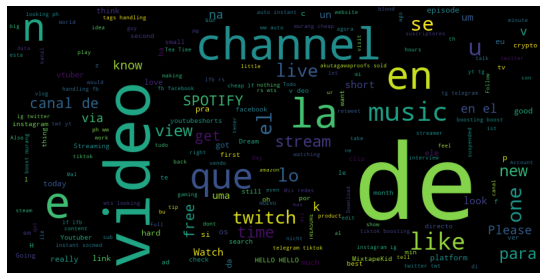

In [59]:
generate_wordcloud(all_words_str)

# 감성분석

In [60]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
import nltk
nltk.download([ "stopwords",  "vader_lexicon"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [62]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(["rt", "youtube"]) ###여기서  필요한 stopwords추가
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

sentiment analysis check

In [63]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

# 데이터셋 전체에 대해서 Sentiment Analysis 실행

In [64]:
sentiment_result = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  cleaned_tweet_str = ' '.join(cleaned_tweet)
  print("전처리 전: " + tweet)
  print("전처리 후: " + cleaned_tweet_str)
  print(sia.polarity_scores(cleaned_tweet_str))

  #positive or negative 분류 compound score가 0 보다 크면 positive, 이하는 negative로 함
  compound_point = sia.polarity_scores(cleaned_tweet_str)['compound']
  if compound_point > 0:
    sentiment_result.append('Positive')

  else:
    sentiment_result.append('Negative')

전처리 전: 😀¡¡NUEVO VIDEO!! 🤓
En el perfil o bio puedes acceder al enlace a Youtube donde podrás visualizar este vídeo u otros muchos 🤓!!  👌🏼¡Actualiza tus conocimientos de Exce y Power BIl! 💻
#excel #excelavanzado #excelpractico #finanzas #formación https://t.co/D2ipbBfGMC https://t.co/OamXToqVur
전처리 후: NUEVO VIDEO En el perfil bio puedes acceder al enlace donde podr visualizar este v deo u otros muchos Actualiza tus conocimientos de Exce Power BIl excel excelavanzado excelpractico finanzas formaci n
{'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.4588}
전처리 전: @jaketropolis @Kraut73931587 the second one is out on youtube 😉https://t.co/yBTKojLhAG
전처리 후: second one
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
전처리 전: We Take Out The BNSG ES44C4 With A Long Freight - Train Sim World 3 https://t.co/HnvRKdmyzi via @YouTube 

#gaming #youtubegaming #trainsimworld #trains
전처리 후: Take BNSG ES C Long Freight Train Sim World via gaming youtubegaming trainsimworld trains
{'neg': 0.0, 

감성분석의 시각화

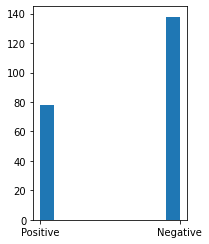

In [65]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [3.0, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.hist(sentiment_result)

# Display the plot
plt.show()

# Topic Analysis

In [66]:
!pip install gensim
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [68]:
import gensim
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaSeqModel, LdaModel

In [69]:
cleaned_tweets_all = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  # print("---------------------")
  # print("전처리 전:", word_tokenize(tweet))
  # print("전처리 후:", cleaned_tweet)
  # print("---------------------")
  cleaned_tweets_all.append(cleaned_tweet)

In [70]:
id2word = Dictionary(cleaned_tweets_all)
corpus = [id2word.doc2bow(text) for text in cleaned_tweets_all]

In [71]:
topic_number = 10 #10개의 topic group로 나눔

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=topic_number,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)

In [72]:
for topic_topwords in lda_model.print_topics():
  print(topic_topwords)

(0, '0.034*"k" + 0.031*"stream" + 0.018*"boost" + 0.015*"beg" + 0.012*"views" + 0.011*"twitter" + 0.008*"facebook" + 0.007*"look" + 0.007*"video" + 0.006*"good"')
(1, '0.024*"VIDEO" + 0.023*"youtubeshorts" + 0.022*"video" + 0.022*"love" + 0.021*"steam" + 0.016*"channel" + 0.013*"vs" + 0.012*"tell" + 0.011*"trying" + 0.011*"Vtuber"')
(2, '0.015*"SPOTIFY" + 0.015*"w" + 0.014*"GENIE" + 0.013*"global" + 0.013*"MUSIC" + 0.013*"Said" + 0.013*"chart" + 0.013*"circle" + 0.013*"digital" + 0.013*"many"')
(3, '0.041*"en" + 0.034*"de" + 0.032*"one" + 0.023*"veo" + 0.017*"canal" + 0.017*"para" + 0.015*"redes" + 0.013*"sociales" + 0.013*"shorts" + 0.012*"photoshop"')
(4, '0.032*"via" + 0.025*"steamdeck" + 0.025*"dock" + 0.014*"vid" + 0.013*"YouTuber" + 0.013*"puppiesofinstagram" + 0.013*"Englishbulldog" + 0.013*"puppy" + 0.013*"SUBSCRIBETODAY" + 0.013*"Bulldog"')
(5, '0.025*"de" + 0.024*"v" + 0.019*"del" + 0.018*"la" + 0.014*"n" + 0.008*"Watch" + 0.006*"qui" + 0.006*"en" + 0.005*"e" + 0.004*"na"')
(

# 참고자료


*   https://www.nltk.org/
*   https://radimrehurek.com/gensim/

*   https://huggingface.co/ (for Deep Learning Models in NLP)
*   https://en.wikipedia.org/wiki/Word_embedding (Word Embedding 는 현재 NLP에서의 핵심 기술)



